In [1]:
# importing notebook dependencies 
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 150

# main libraries
import pandas as pd
import numpy as np

# importing vega datasets
from vega_datasets import data

# visualization libraries/modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid", font_scale = 0.75)

from datetime import datetime
import requests

from tqdm.notebook import tqdm, trange
import time # to be used in loop iterations

In [2]:
# inspecting the vega datasets -- extracting "sf_temps()" data

temps = data.sf_temps()
print()
print(f'shape: {temps.shape}')
temps.head()


shape: (8759, 2)


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


----
* For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.
* For this exercise you'll need to install a library that will provide us access to some more datasets:

* Write the code necessary to visualize the minimum temperature over time.
* Write the code necessary to visualize the maximum temperature over time.
* Which month is the coldest, on average?
* Which month has the highest average temperature?
* Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
* Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.
* from vega_datasets import data
* data.seattle_weather()


In [3]:
# info check

temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
# date column appears to be in accurate datetime format
# moving this column to the index col

temps = temps.set_index("date").sort_index()
temps.head() # checks out!

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [5]:
# Exersice 1: Resample by the day and take the average temperature. 
# Visualize the average temperature over time.

daily_mean = temps.resample('D').mean()
daily_mean

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


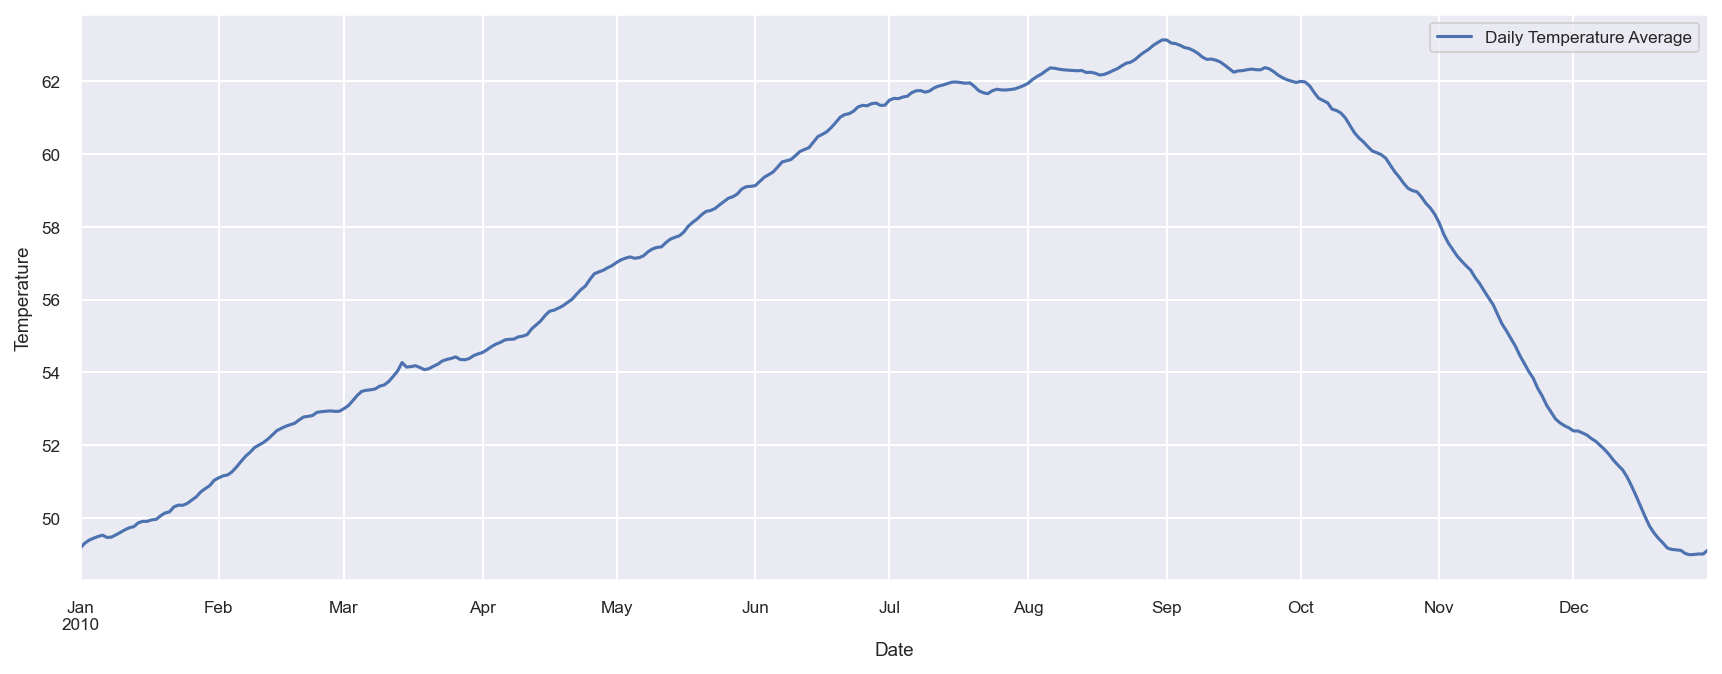

In [6]:
# visualizing the daily temperature average

plt.figure(figsize = (14, 5))
daily_mean.temp.plot(label = "Daily Temperature Average")

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [7]:
# Write the code necessary to visualize the minimum temperature over time

min_temp = temps.resample('D').min()
min_temp

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


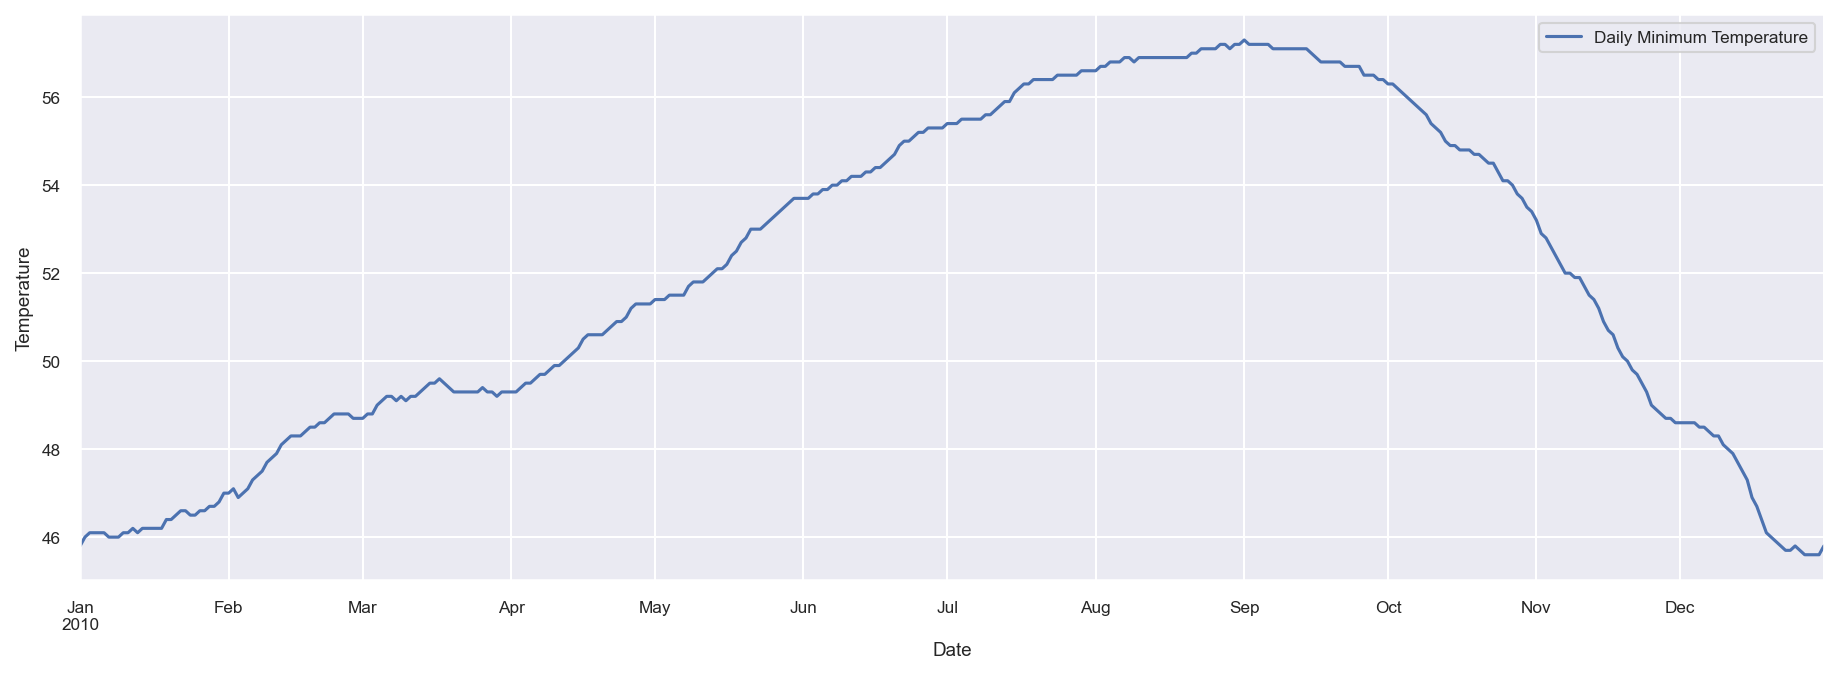

In [8]:
# let's visualize minimum temp over time
plt.figure(figsize = (15, 5))

ax = min_temp.temp.plot(label = "Daily Minimum Temperature")

plt.xlabel("Date")
plt.ylabel("Temperature")
# plt.ylabel("Temperature", rotation =0)
plt.legend()
plt.show()

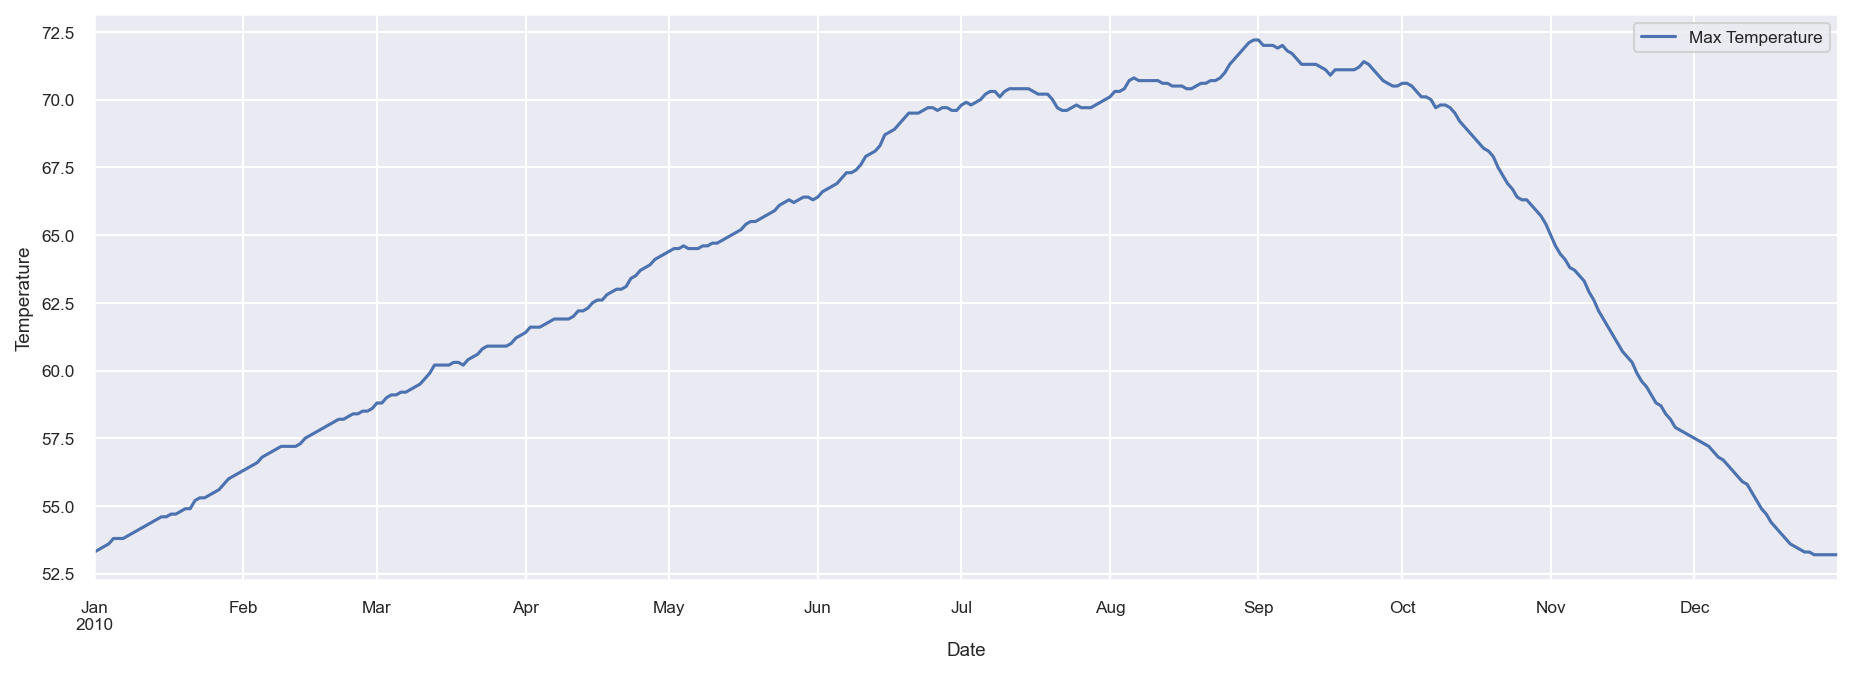

In [9]:
# Write the code necessary to visualize the maximum temperature over time.
plt.figure(figsize = (15, 5))

max_temp = temps.resample('D').max()
max_temp.temp.plot(label = "Max Temperature")

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [10]:
# Which month is the coldest, on average?

month_avg_temps = temps.resample('M').mean()
month_avg_temps.head()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968


In [11]:
# returning the coldest month

coldest_month = month_avg_temps.loc[month_avg_temps["temp"].idxmin()]
coldest_month # where on average, January is the coldest month in the dataset

temp    49.98414
Name: 2010-01-31 00:00:00, dtype: float64

In [12]:
# Which month has the highest average temperature?

warmest_month = month_avg_temps.loc[month_avg_temps["temp"].idxmax()]
warmest_month # where on average, September is the coldest month in the dataset

temp    62.487083
Name: 2010-09-30 00:00:00, dtype: float64

----
#### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max']))

* Use this resampled dataframe to calculate the change in temperature for the day
* Which month has the highest daily temperature variability?

In [13]:
# returning min and max temperatures on ea. day in the dataset

min_and_max_temps = temps.resample('D')
min_and_max_temps = min_and_max_temps.temp.agg(["min", "max"])
min_and_max_temps

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [14]:
# Use this resampled dataframe to calculate the change in temperature for the day
min_and_max_temps['range'] = min_and_max_temps['max'] - min_and_max_temps['min']
min_and_max_temps

,min,max,range
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [15]:
# calculating highest variability = range per month

highest_monthly_variability = min_and_max_temps.resample('M').mean().round(2)
highest_monthly_variability 

,min,max,range
date,,,
2010-01-31,46.31,54.65,8.34
2010-02-28,48.06,57.55,9.49
2010-03-31,49.24,60.09,10.85
2010-04-30,50.33,62.65,12.32
2010-05-31,52.40,65.31,12.91
2010-06-30,54.48,68.43,13.95
2010-07-31,56.05,70.02,13.98
2010-08-31,56.94,70.81,13.87
2010-09-30,56.90,71.31,14.40


In [16]:
# highest monthly temp. variability 
# September

highest_monthly_variability.loc[highest_monthly_variability['range'].idxmax()]

min      56.90
max      71.31
range    14.40
Name: 2010-09-30 00:00:00, dtype: float64

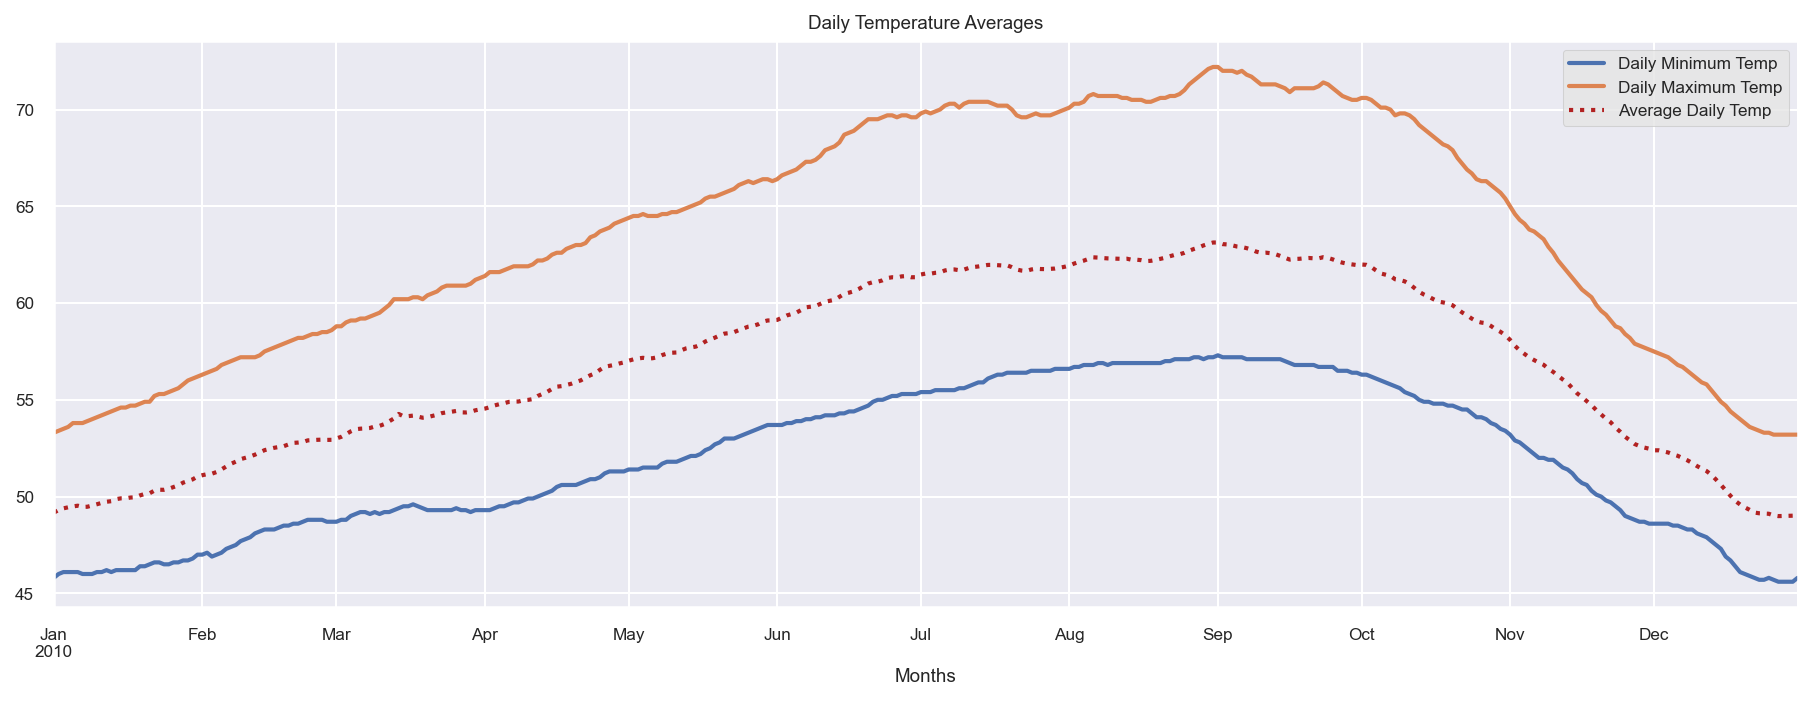

In [17]:
plt.figure(figsize = (15, 5))


min_temp['temp'].plot(label = "Daily Minimum Temp", linewidth = 2)
max_temp['temp'].plot(label = "Daily Maximum Temp", linewidth = 2)
daily_mean['temp'].plot(label = "Average Daily Temp", linewidth = 2, color = 'firebrick', linestyle = ":")


plt.title("Daily Temperature Averages")
plt.xlabel("Months")
plt.style.use('ggplot')
plt.legend()
plt.show()

----
Use the dataset to answer the following questions:

* Which year and month combination has the highest amount of precipitation?
* Visualize the amount of monthly precipitation over time.
* Visualize the amount of wind over time. Choose a time interval you think is appropriate.
* Which year-month combination is the windiest?
* What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
* In which month does it rain the most?
* Which month has the most number of days with a non-zero amount of precipitation?

In [18]:
# importing the seattle weather data

seattle = data.seattle_weather()
print()
print(f'shape: {seattle.shape}')
seattle


shape: (1461, 6)


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [19]:
# checking the df information

seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [20]:
# let's set the date column as the index
# also removing the date header in index position

seattle = seattle.set_index("date").rename_axis(index = None)
seattle

,precipitation,temp_max,temp_min,wind,weather
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog
2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
# Which year and month combination has the highest amount of precipitation?

seattle.resample("")